In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import random
import copy
import seaborn as sns
from matplotlib import cm

This is a simulation of index hopping and how it is removed by demultiplexing with inline indexes. 

In [2]:
# define a function that takes a triple (above) and randomly changes the i5 or i7 index
# will only really make sense in context, below

def hop_index(library, i5s, i7s):
    new_library=copy.deepcopy(library)
    i5i7=[i5s,i7s]
    index=math.floor(random.random()*2)
    hop_options=[i for i in range(i5i7[index]) if i!=library[index]]
    new_library[index]=random.choice(hop_options)
    return new_library

## Horizontal rows
First, I set everything up and run the simulation when we have 16 inline indexes, each corresponding to 2 rows of the chip

In [3]:
# initialize a 32X32 array where each entry is a triple (the i5, the i7, and the inline index)
i5s, i7s, inlines = (32, 32, 3)

num_iterations = 1000
icell8 =  [[ ['' for inline in range(inlines)] for i7 in range(i7s)] for i5 in range(i5s)]

# in this first attempt I put inline indexes in horizontal rows, with pairs of rows having the same index

for i5 in range(i5s):
    for i7 in range(i7s):
        icell8[i5][i7][0]=i5
        icell8[i5][i7][1]=i7
        icell8[i5][i7][2]=math.floor(i5/2)

icell8_flat=[icell8[i5][i7] for i5 in range(i5s) for i7 in range(i7s)]


<AxesSubplot:>

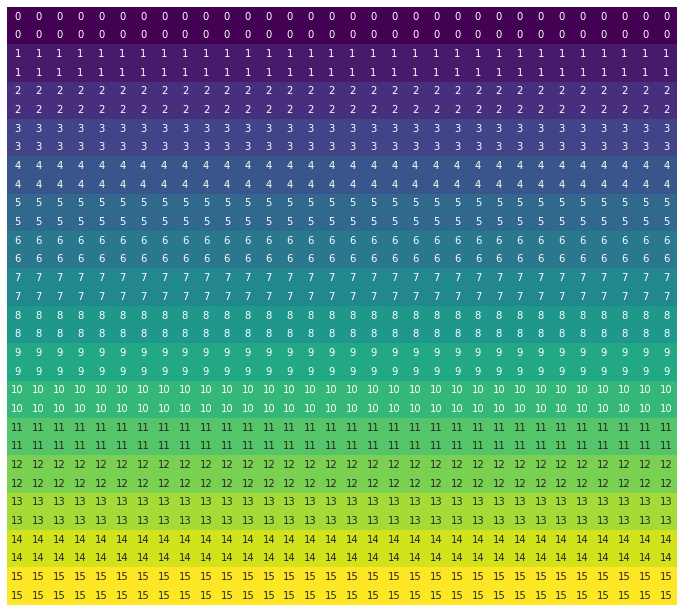

In [4]:
# A picture of the inline indexes in the chip

grid_of_inlines=[[ icell8[i5][i7][2] for i7 in range(i7s)] for i5 in range(i5s)]

fig, ax = plt.subplots(figsize=[12,11])
sns.heatmap(grid_of_inlines, annot=True,cmap=cm.get_cmap('viridis', 16),xticklabels=False,yticklabels=False, cbar=False, ax=ax)


In [5]:
# perform index hopping several times on the whole icell8 array
# then check whether we can identify it using the inline indexes

results= [None] * num_iterations
for j in range(num_iterations):
    icell8_hopped=[[hop_index(icell8[i5][i7], i5s, i7s) for i7 in range(i7s)] for i5 in range(i5s)]
    results[j]=[[icell8_hopped[i5][i7] in icell8_flat for i7 in range(i7s)] for i5 in range(i5s)]

results_flat=[results[j][i5][i7] for j in range(num_iterations) for i5 in range(i5s) for i7 in range(i7s)]

In [6]:
# calculate the fraction remaining of index hopping

overall_remaining_hops=sum(results_flat)/len(results_flat)

# calculate the same, but by position in the icell8 chip

position_remaining_hops=[[sum([results[j][i5][i7]/num_iterations for j in range(num_iterations)]) for i7 in range(i7s)] for i5 in range(i5s)]

Text(0.5, 1.0, 'Remaining fraction index hopping after inline adapters')

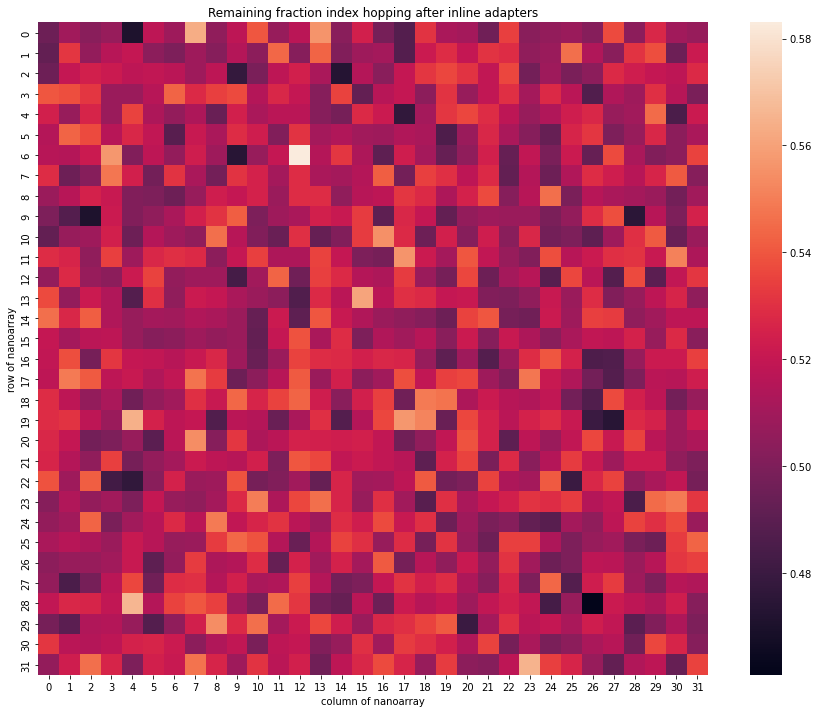

In [7]:

fig, ax = plt.subplots(figsize=[15,12])
sns.heatmap(position_remaining_hops,ax=ax)
ax.set_xlabel("column of nanoarray")
ax.set_ylabel("row of nanoarray")
ax.set_title("Remaining fraction index hopping after inline adapters")

In [8]:
overall_remaining_hops

0.51611328125

In [9]:
# The average over all cell-level reductions should be the same

p=[position_remaining_hops[i5][i7]  for i5 in range(i5s) for i7 in range(i7s)]
sum(p)/len(p)

0.5161132812499999

In [10]:
# 90% of wells have less than this amount of index hopping remaining

np.percentile(p, 90)

0.5350000000000004

The conclusion from the previous section is that we will only remove less than half of index hopping by spotting inline indexes in pairs of rows in a 32X32 array. Need to do better!

## 8x8 sub-grids

Next up, spotting inline indexes in 4x4 squares within the array

In [11]:
i5s, i7s, inlines = (32, 32, 3)

num_iterations = 1000
icell8 =  [[ ['' for inline in range(inlines)] for i7 in range(i7s)] for i5 in range(i5s)]

for i5 in range(i5s):
    for i7 in range(i7s):
        icell8[i5][i7][0]=i5
        icell8[i5][i7][1]=i7
        icell8[i5][i7][2]= math.floor(i7/8) + math.floor(i5/8)*4 
        
icell8_flat=[icell8[i5][i7] for i5 in range(i5s) for i7 in range(i7s)]

<AxesSubplot:>

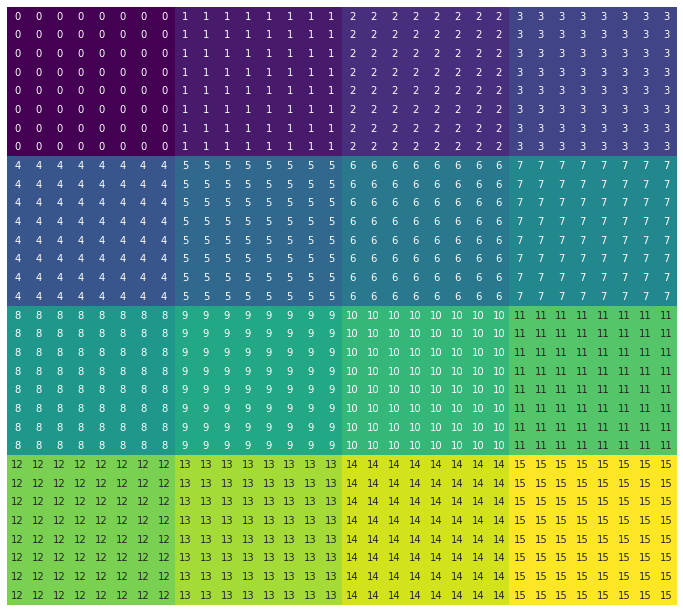

In [12]:
# A picture of the inline indexes in the chip

grid_of_inlines=[[ icell8[i5][i7][2] for i7 in range(i7s)] for i5 in range(i5s)]

fig, ax = plt.subplots(figsize=[12,11])
sns.heatmap(grid_of_inlines, annot=True,cmap=cm.get_cmap('viridis', 16),xticklabels=False,yticklabels=False, cbar=False, ax=ax)

In [13]:
# perform index hopping several times on the whole icell8 array
# then check whether we can identify it using the inline indexes

results= [None] * num_iterations
for j in range(num_iterations):
    icell8_hopped=[[hop_index(icell8[i5][i7], i5s, i7s) for i7 in range(i7s)] for i5 in range(i5s)]
    results[j]=[[icell8_hopped[i5][i7] in icell8_flat for i7 in range(i7s)] for i5 in range(i5s)]

results_flat=[results[j][i5][i7] for j in range(num_iterations) for i5 in range(i5s) for i7 in range(i7s)]

In [14]:
# calculate the fraction remaining of index hopping

overall_remaining_hops=sum(results_flat)/len(results_flat)

# calculate the same, but by position in the icell8 chip

position_remaining_hops=[[sum([results[j][i5][i7]/num_iterations for j in range(num_iterations)]) for i7 in range(i7s)] for i5 in range(i5s)]

Text(0.5, 1.0, 'Remaining fraction index hopping after inline adapters')

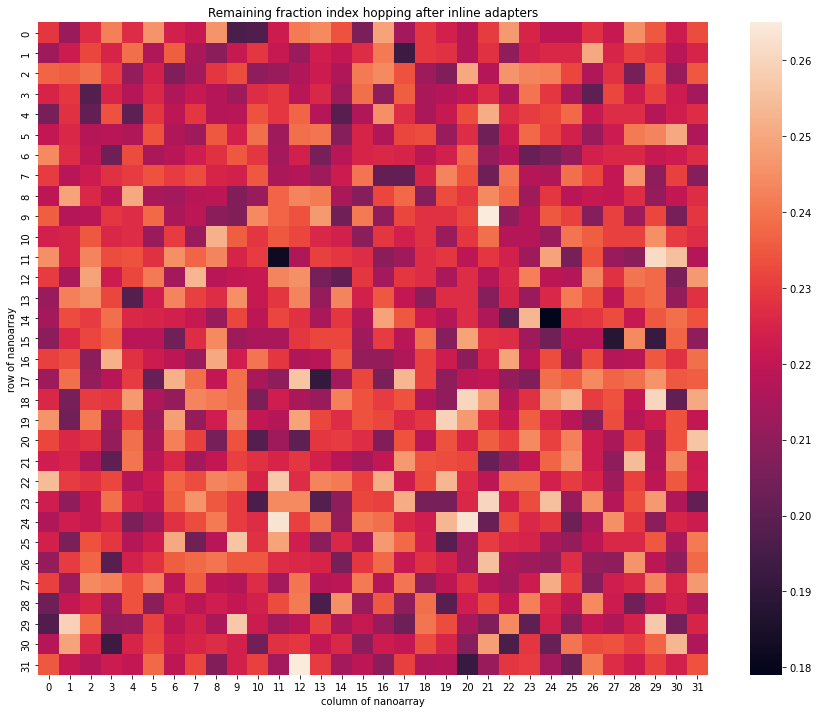

In [15]:
fig, ax = plt.subplots(figsize=[15,12])
sns.heatmap(position_remaining_hops,ax=ax)
ax.set_xlabel("column of nanoarray")
ax.set_ylabel("row of nanoarray")
ax.set_title("Remaining fraction index hopping after inline adapters")

In [16]:
overall_remaining_hops

0.2256142578125

In [17]:
# The average over all cell-level reductions should be the same

p=[position_remaining_hops[i5][i7]  for i5 in range(i5s) for i7 in range(i7s)]
sum(p)/len(p)

0.22561425781250058

So now we see that with blocks, only 22.6% of hopping should get past our indexes, equivalent to a 4.4-fold index hopping reduction.


In [18]:
# 90% of wells have less than this amount of index hopping remaining

np.percentile(p, 90)

0.2430000000000002

## Custom chip

The previous grid LOOKS a bit like the custom chip, but it's really not. That's because each row and column has a unique inline index, whereas we typically have each 7X7 cluster with a unique i5 (and recently also a unique inline), with the 49 wells all having unique i7

In [19]:
i5s, i7s, inlines = (28, 28, 3)

num_iterations = 1000
icell8 =  [[ ['' for inline in range(inlines)] for i7 in range(i7s)] for i5 in range(i5s)]

for i5 in range(i5s):
    for i7 in range(i7s):
        icell8[i5][i7][0]= math.floor(i7/7) + math.floor(i5/7)*4
        icell8[i5][i7][1]= i7 % 7 + (i5 % 7)*7 
        icell8[i5][i7][2]= math.floor(i7/7) + math.floor(i5/7)*4 
        
icell8_flat=[icell8[i5][i7] for i5 in range(i5s) for i7 in range(i7s)]

<AxesSubplot:>

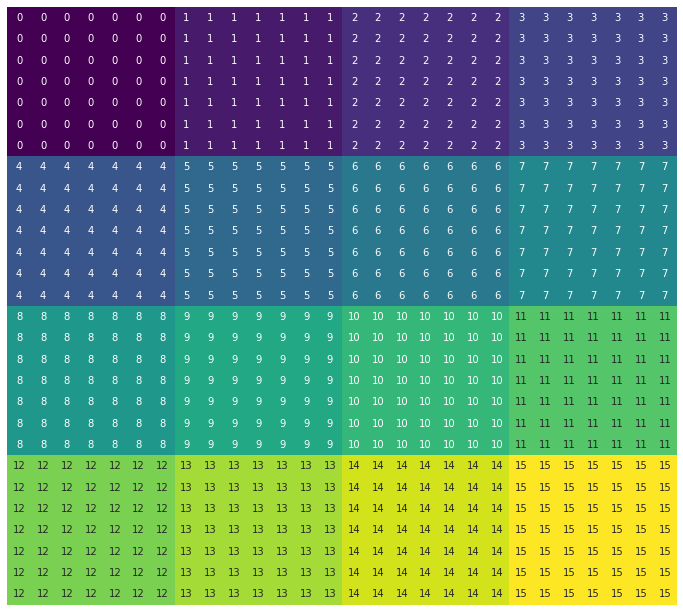

In [20]:
# A picture of the inline indexes in the chip (the i5s are the same)

grid_of_inlines=[[ icell8[i5][i7][2] for i7 in range(i7s)] for i5 in range(i5s)]

fig, ax = plt.subplots(figsize=[12,11])
sns.heatmap(grid_of_inlines, annot=True,cmap=cm.get_cmap('viridis', 16),xticklabels=False,yticklabels=False, cbar=False, ax=ax)

<AxesSubplot:>

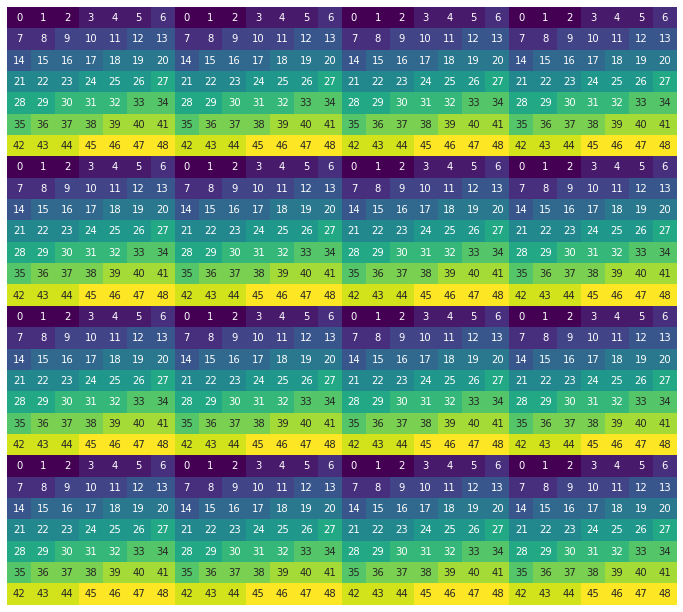

In [21]:
# This is what the i7s look like

grid_of_i7s=[[ icell8[i5][i7][1] for i7 in range(i7s)] for i5 in range(i5s)]

fig, ax = plt.subplots(figsize=[12,11])
sns.heatmap(grid_of_i7s, annot=True,cmap=cm.get_cmap('viridis', 16),xticklabels=False,yticklabels=False, cbar=False, ax=ax)

In [22]:
# perform index hopping several times on the whole icell8 array
# then check whether we can identify it using the inline indexes

results= [None] * num_iterations
for j in range(num_iterations):
    icell8_hopped=[[hop_index(icell8[i5][i7], i5s, i7s) for i7 in range(i7s)] for i5 in range(i5s)]
    results[j]=[[icell8_hopped[i5][i7] in icell8_flat for i7 in range(i7s)] for i5 in range(i5s)]

results_flat=[results[j][i5][i7] for j in range(num_iterations) for i5 in range(i5s) for i7 in range(i7s)]

In [23]:
# calculate the fraction remaining of index hopping

overall_remaining_hops=sum(results_flat)/len(results_flat)

# calculate the same, but by position in the icell8 chip

position_remaining_hops=[[sum([results[j][i5][i7]/num_iterations for j in range(num_iterations)]) for i7 in range(i7s)] for i5 in range(i5s)]

Text(0.5, 1.0, 'Remaining fraction index hopping after inline adapters')

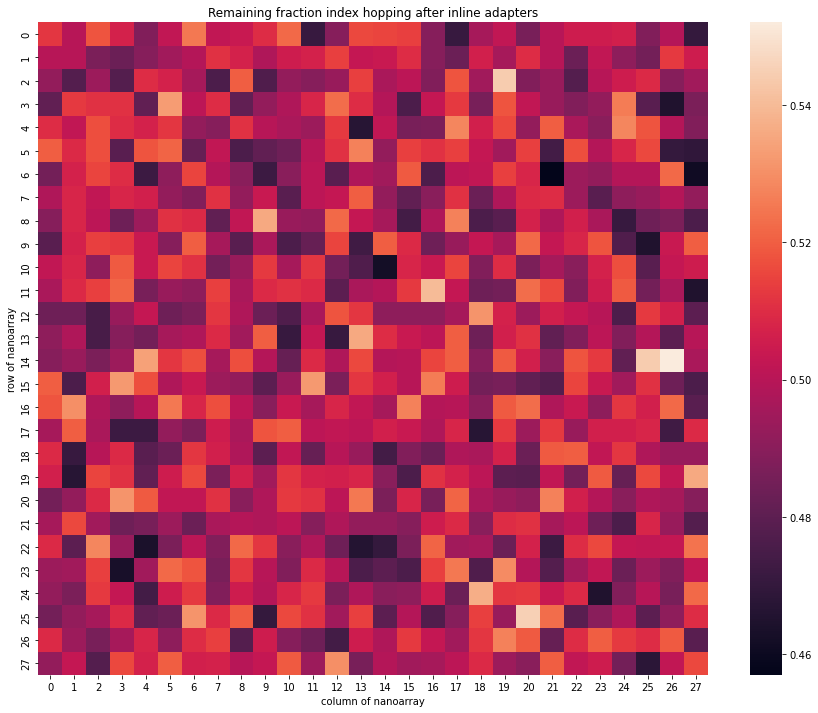

In [24]:
fig, ax = plt.subplots(figsize=[15,12])
sns.heatmap(position_remaining_hops,ax=ax)
ax.set_xlabel("column of nanoarray")
ax.set_ylabel("row of nanoarray")
ax.set_title("Remaining fraction index hopping after inline adapters")

In [25]:
overall_remaining_hops

0.4993890306122449

In [26]:
# The average over all cell-level reductions should be the same

p=[position_remaining_hops[i5][i7]  for i5 in range(i5s) for i7 in range(i7s)]
sum(p)/len(p)

0.4993890306122461

In [27]:
# 90% of wells have less than this amount of index hopping remaining

np.percentile(p, 90)

0.5187000000000004

So now we see that with the custom chip, we predict ~50% reduction in index hopping, which is what we observe.

## Basic diagonals
Probably we can do better with diagonals somehow?

In [28]:
i5s, i7s, inlines = (32, 32, 3)

num_iterations = 1000
icell8 =  [[ ['' for inline in range(inlines)] for i7 in range(i7s)] for i5 in range(i5s)]

for i5 in range(i5s):
    for i7 in range(i7s):
        icell8[i5][i7][0]=i5
        icell8[i5][i7][1]=i7
        icell8[i5][i7][2]= math.floor(abs(i5-i7)/2)
        
icell8_flat=[icell8[i5][i7] for i5 in range(i5s) for i7 in range(i7s)]

<AxesSubplot:>

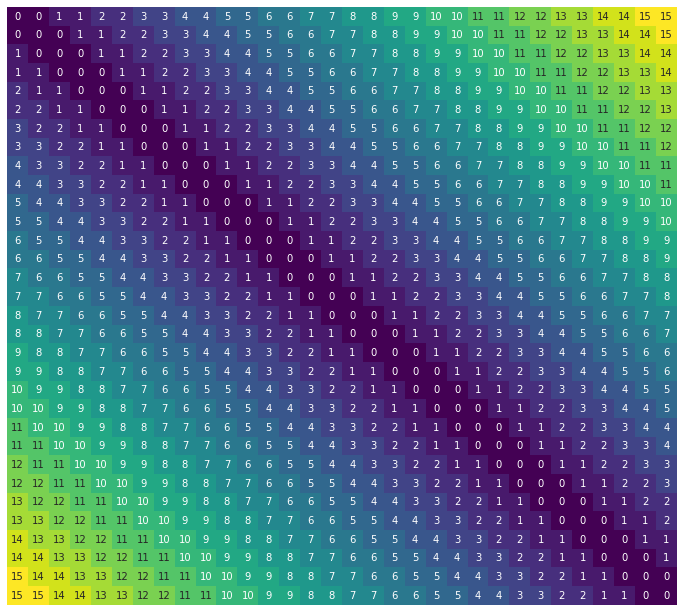

In [29]:
# A picture of the inline indexes in the chip

grid_of_inlines=[[ icell8[i5][i7][2] for i7 in range(i7s)] for i5 in range(i5s)]

fig, ax = plt.subplots(figsize=[12,11])
sns.heatmap(grid_of_inlines, annot=True,cmap=cm.get_cmap('viridis', 16),xticklabels=False,yticklabels=False, cbar=False, ax=ax)

In [30]:
# perform index hopping several times on the whole icell8 array
# then check whether we can identify it using the inline indexes

results= [None] * num_iterations
for j in range(num_iterations):
    icell8_hopped=[[hop_index(icell8[i5][i7], i5s, i7s) for i7 in range(i7s)] for i5 in range(i5s)]
    results[j]=[[icell8_hopped[i5][i7] in icell8_flat for i7 in range(i7s)] for i5 in range(i5s)]

results_flat=[results[j][i5][i7] for j in range(num_iterations) for i5 in range(i5s) for i7 in range(i7s)]

In [31]:
# calculate the fraction remaining of index hopping

overall_remaining_hops=sum(results_flat)/len(results_flat)

# calculate the same, but by position in the icell8 chip

position_remaining_hops=[[sum([results[j][i5][i7]/num_iterations for j in range(num_iterations)]) for i7 in range(i7s)] for i5 in range(i5s)]

Text(0.5, 1.0, 'Remaining fraction index hopping after inline adapters')

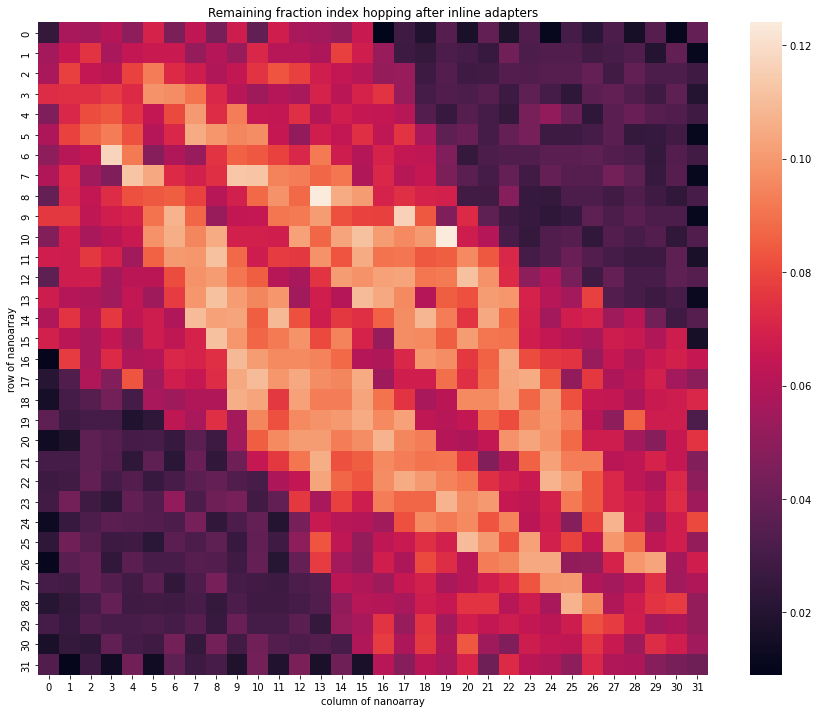

In [32]:
fig, ax = plt.subplots(figsize=[15,12])
sns.heatmap(position_remaining_hops,ax=ax)
ax.set_xlabel("column of nanoarray")
ax.set_ylabel("row of nanoarray")
ax.set_title("Remaining fraction index hopping after inline adapters")

In [33]:
overall_remaining_hops

0.060443359375

In [34]:
# The average over all cell-level reductions should be the same

p=[position_remaining_hops[i5][i7]  for i5 in range(i5s) for i7 in range(i7s)]
sum(p)/len(p)

0.060443359374999964

In [35]:
# 90% of wells have less than this amount of index hopping remaining

np.percentile(p, 90)

0.09800000000000007

Now it looks as though we're doing pretty well, but with some annoying spatial patterns.

 ## Better diagonals
 Maybe we can just flip the top diagonal half? 

In [36]:
i5s, i7s, inlines = (32, 32, 3)

num_iterations = 1000
icell8 =  [[ ['' for inline in range(inlines)] for i7 in range(i7s)] for i5 in range(i5s)]

for i5 in range(i5s):
    for i7 in range(i7s):
        icell8[i5][i7][0]=i5
        icell8[i5][i7][1]=i7
        if i5 > i7:
            icell8[i5][i7][2]= 15-math.floor(abs(i5-i7-1)/2)
        else:
            icell8[i5][i7][2]= math.floor(abs(i5-i7)/2)
            
icell8_flat=[icell8[i5][i7] for i5 in range(i5s) for i7 in range(i7s)]

<AxesSubplot:>

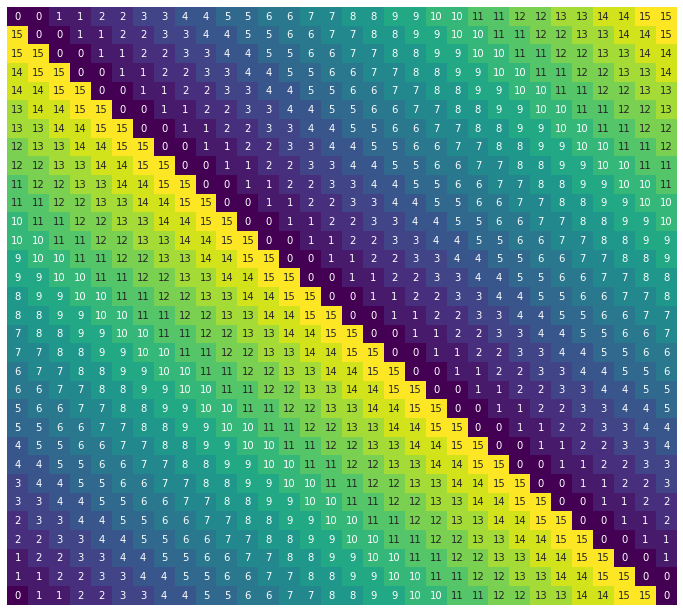

In [37]:
# A picture of the inline indexes in the chip

grid_of_inlines=[[ icell8[i5][i7][2] for i7 in range(i7s)] for i5 in range(i5s)]

fig, ax = plt.subplots(figsize=[12,11])
sns.heatmap(grid_of_inlines, annot=True,cmap=cm.get_cmap('viridis', 16),xticklabels=False,yticklabels=False, cbar=False, ax=ax)

In [38]:
# perform index hopping several times on the whole icell8 array
# then check whether we can identify it using the inline indexes

results= [None] * num_iterations
for j in range(num_iterations):
    icell8_hopped=[[hop_index(icell8[i5][i7], i5s, i7s) for i7 in range(i7s)] for i5 in range(i5s)]
    results[j]=[[icell8_hopped[i5][i7] in icell8_flat for i7 in range(i7s)] for i5 in range(i5s)]

results_flat=[results[j][i5][i7] for j in range(num_iterations) for i5 in range(i5s) for i7 in range(i7s)]

In [39]:
# calculate the fraction remaining of index hopping

overall_remaining_hops=sum(results_flat)/len(results_flat)

# calculate the same, but by position in the icell8 chip

position_remaining_hops=[[sum([results[j][i5][i7]/num_iterations for j in range(num_iterations)]) for i7 in range(i7s)] for i5 in range(i5s)]

Text(0.5, 1.0, 'Remaining fraction index hopping after inline adapters')

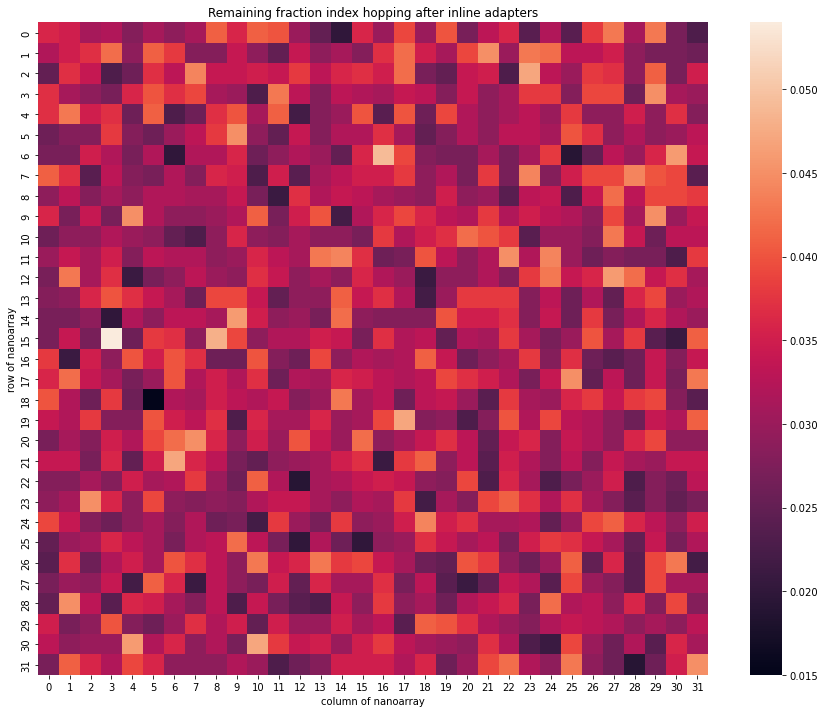

In [40]:
fig, ax = plt.subplots(figsize=[15,12])
sns.heatmap(position_remaining_hops,ax=ax)
ax.set_xlabel("column of nanoarray")
ax.set_ylabel("row of nanoarray")
ax.set_title("Remaining fraction index hopping after inline adapters")

In [41]:
overall_remaining_hops

0.032294921875

In [42]:
# The average over all cell-level reductions should be the same

p=[position_remaining_hops[i5][i7]  for i5 in range(i5s) for i7 in range(i7s)]
sum(p)/len(p)

0.032294921874999986

In [43]:
# 90% of wells have less than this amount of index hopping remaining

np.percentile(p, 90)

0.039700000000000076

This is really nice: Very little index hopping background remaining! Of course if we only get 10% index hopping, this 3.22% remaining will correspond to 10% x 3.22% = 0.322% background remaining.

Note that in a previous test, when the line of 15s near the middle was only 1 wide rather than 2 wide, there was a funny pattern where the edges had slightly more index hopping. So modifying this may turn out to be somewhat interesting.

## Same better diagonals but on 64X64 chip (4096 libraries)

We may want to expand and make more libraries

In [44]:
i5s, i7s, inlines = (64, 64, 3)

num_iterations = 200
icell8 =  [[ ['' for inline in range(inlines)] for i7 in range(i7s)] for i5 in range(i5s)]

for i5 in range(i5s):
    for i7 in range(i7s):
        icell8[i5][i7][0]=i5
        icell8[i5][i7][1]=i7
        if i5 > i7:
            icell8[i5][i7][2]= 15-math.floor(abs(i5-i7-1)/4)
        else:
            icell8[i5][i7][2]= math.floor(abs(i5-i7)/4)
            
icell8_flat=[icell8[i5][i7] for i5 in range(i5s) for i7 in range(i7s)]

<AxesSubplot:>

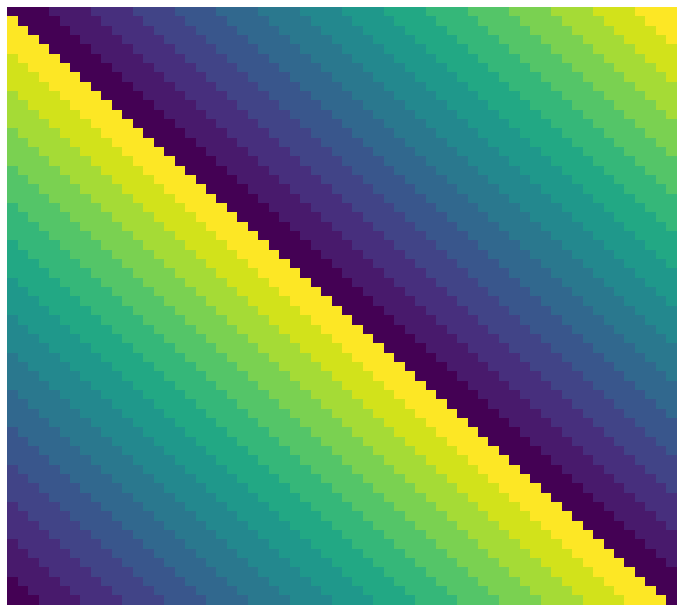

In [45]:
# A picture of the inline indexes in the chip

grid_of_inlines=[[ icell8[i5][i7][2] for i7 in range(i7s)] for i5 in range(i5s)]

fig, ax = plt.subplots(figsize=[12,11])
sns.heatmap(grid_of_inlines, annot=False,cmap=cm.get_cmap('viridis', 16),xticklabels=False,yticklabels=False, cbar=False, ax=ax)

In [46]:
# perform index hopping several times on the whole icell8 array
# then check whether we can identify it using the inline indexes

results= [None] * num_iterations
for j in range(num_iterations):
    icell8_hopped=[[hop_index(icell8[i5][i7], i5s, i7s) for i7 in range(i7s)] for i5 in range(i5s)]
    results[j]=[[icell8_hopped[i5][i7] in icell8_flat for i7 in range(i7s)] for i5 in range(i5s)]

results_flat=[results[j][i5][i7] for j in range(num_iterations) for i5 in range(i5s) for i7 in range(i7s)]

In [47]:
# calculate the fraction remaining of index hopping

overall_remaining_hops=sum(results_flat)/len(results_flat)

# calculate the same, but by position in the icell8 chip

position_remaining_hops=[[sum([results[j][i5][i7]/num_iterations for j in range(num_iterations)]) for i7 in range(i7s)] for i5 in range(i5s)]

Text(0.5, 1.0, 'Remaining fraction index hopping after inline adapters')

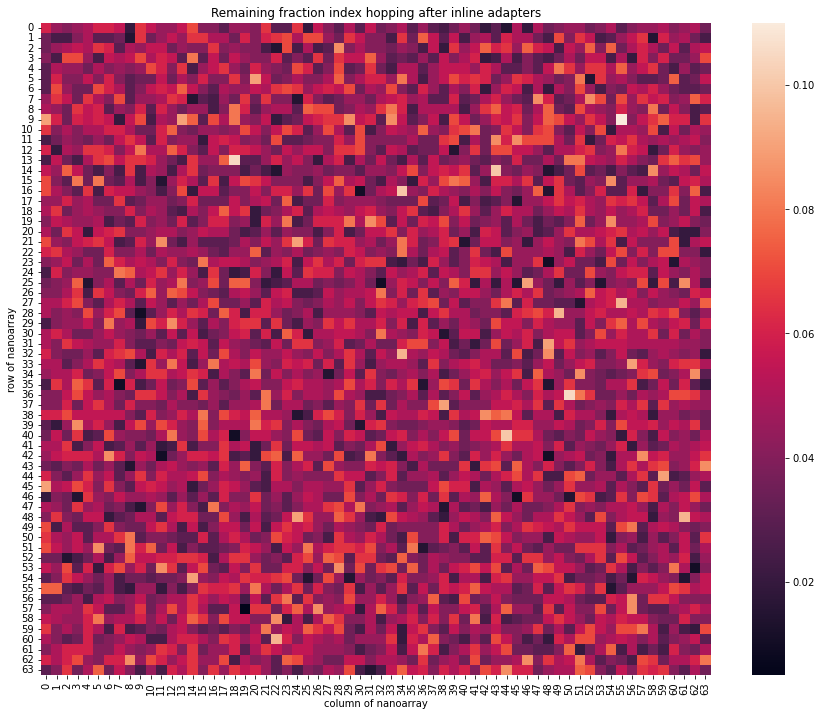

In [48]:
fig, ax = plt.subplots(figsize=[15,12])
sns.heatmap(position_remaining_hops,ax=ax)
ax.set_xlabel("column of nanoarray")
ax.set_ylabel("row of nanoarray")
ax.set_title("Remaining fraction index hopping after inline adapters")

In [49]:
overall_remaining_hops

0.047515869140625

In [50]:
# The average over all cell-level reductions should be the same

p=[position_remaining_hops[i5][i7]  for i5 in range(i5s) for i7 in range(i7s)]
sum(p)/len(p)

0.04751586914062506

In [51]:
# 90% of wells have less than this amount of index hopping remaining

np.percentile(p, 90)

0.06499999999999999

So we basically still do pretty well, although with 1.5X more IH

## What about a smaller square, 24x24 with 12 inline indexes?

In [52]:
i5s, i7s, inlines = (24, 24, 3)

num_iterations = 1000
icell8 =  [[ ['' for inline in range(inlines)] for i7 in range(i7s)] for i5 in range(i5s)]

for i5 in range(i5s):
    for i7 in range(i7s):
        icell8[i5][i7][0]=i5
        icell8[i5][i7][1]=i7
        if i5 > i7:
            icell8[i5][i7][2]= 11-math.floor(abs(i5-i7-1)/2)
        else:
            icell8[i5][i7][2]= math.floor(abs(i5-i7)/2)
            
icell8_flat=[icell8[i5][i7] for i5 in range(i5s) for i7 in range(i7s)]

<AxesSubplot:>

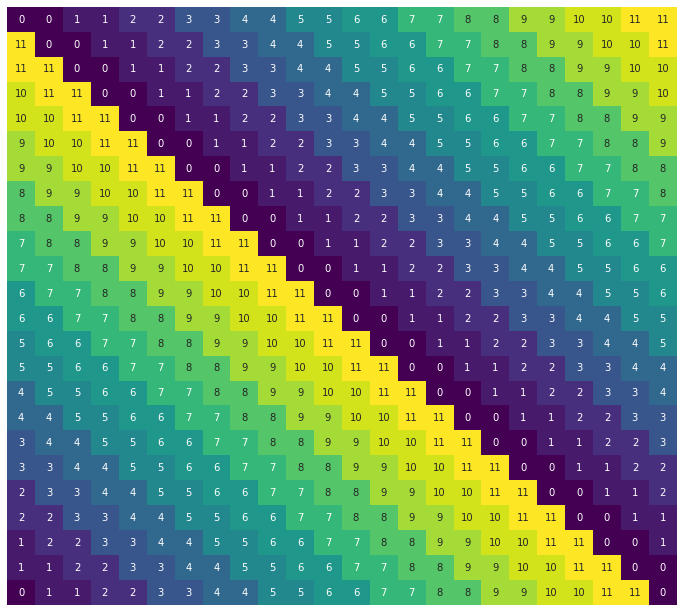

In [53]:
# A picture of the inline indexes in the chip

grid_of_inlines=[[ icell8[i5][i7][2] for i7 in range(i7s)] for i5 in range(i5s)]

fig, ax = plt.subplots(figsize=[12,11])
sns.heatmap(grid_of_inlines, annot=True,cmap=cm.get_cmap('viridis', 16),xticklabels=False,yticklabels=False, cbar=False, ax=ax)

In [54]:
# perform index hopping several times on the whole icell8 array
# then check whether we can identify it using the inline indexes

results= [None] * num_iterations
for j in range(num_iterations):
    icell8_hopped=[[hop_index(icell8[i5][i7], i5s, i7s) for i7 in range(i7s)] for i5 in range(i5s)]
    results[j]=[[icell8_hopped[i5][i7] in icell8_flat for i7 in range(i7s)] for i5 in range(i5s)]

results_flat=[results[j][i5][i7] for j in range(num_iterations) for i5 in range(i5s) for i7 in range(i7s)]

In [55]:
# calculate the fraction remaining of index hopping

overall_remaining_hops=sum(results_flat)/len(results_flat)

# calculate the same, but by position in the icell8 chip

position_remaining_hops=[[sum([results[j][i5][i7]/num_iterations for j in range(num_iterations)]) for i7 in range(i7s)] for i5 in range(i5s)]

Text(0.5, 1.0, 'Remaining fraction index hopping after inline adapters')

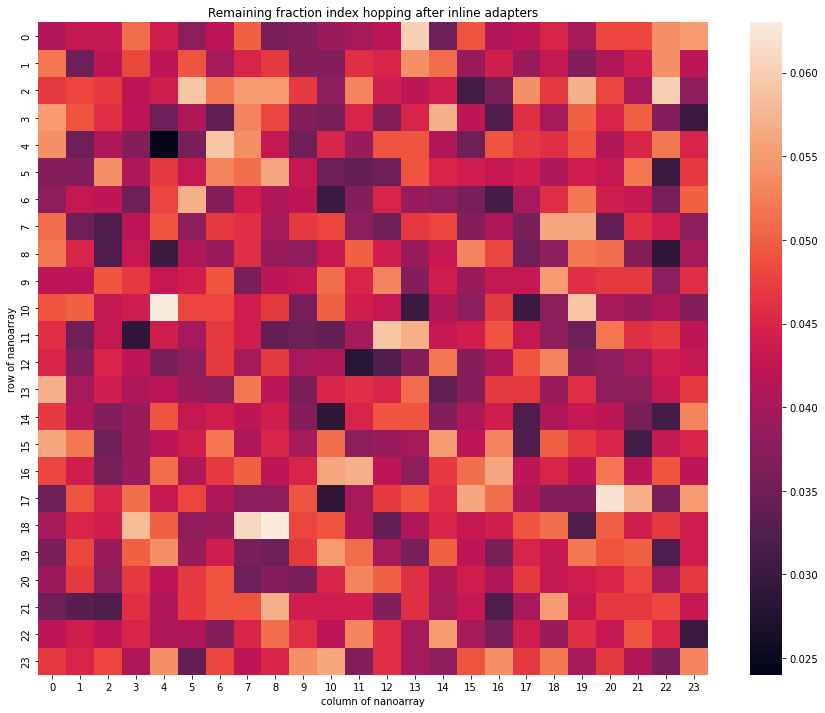

In [56]:
fig, ax = plt.subplots(figsize=[15,12])
sns.heatmap(position_remaining_hops,ax=ax)
ax.set_xlabel("column of nanoarray")
ax.set_ylabel("row of nanoarray")
ax.set_title("Remaining fraction index hopping after inline adapters")

In [57]:
overall_remaining_hops

0.04373784722222222

In [58]:
# The average over all cell-level reductions should be the same

p=[position_remaining_hops[i5][i7]  for i5 in range(i5s) for i7 in range(i7s)]
sum(p)/len(p)

0.04373784722222228

In [59]:
# 90% of wells have less than this amount of index hopping remaining

np.percentile(p, 90)

0.05300000000000004

So we'd get pretty good results, but again not quite as good as the magical 32x32 with 16 inlines case

 ## Same, but what if it was a rectangle, say 32X16?


In [60]:
i5s, i7s, inlines = (32, 16, 3)

num_iterations = 1000
icell8 =  [[ ['' for inline in range(inlines)] for i7 in range(i7s)] for i5 in range(i5s)]

for i5 in range(i5s):
    for i7 in range(i7s):
        icell8[i5][i7][0]=i5
        icell8[i5][i7][1]=i7
        if i5 > i7:
            icell8[i5][i7][2]= 15-math.floor(abs(i5-i7-1)/2)
        else:
            icell8[i5][i7][2]= math.floor(abs(i5-i7)/2)
            
icell8_flat=[icell8[i5][i7] for i5 in range(i5s) for i7 in range(i7s)]

<AxesSubplot:>

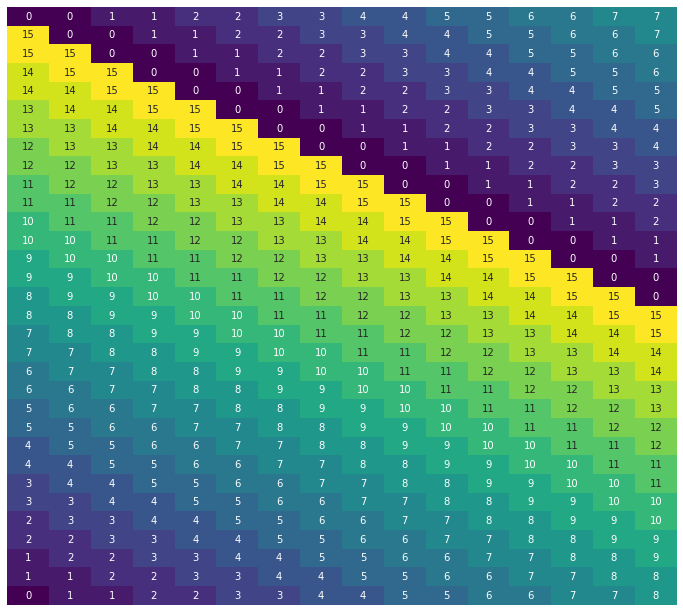

In [61]:
# A picture of the inline indexes in the chip

grid_of_inlines=[[ icell8[i5][i7][2] for i7 in range(i7s)] for i5 in range(i5s)]

fig, ax = plt.subplots(figsize=[12,11])
sns.heatmap(grid_of_inlines, annot=True,cmap=cm.get_cmap('viridis', 16),xticklabels=False,yticklabels=False, cbar=False, ax=ax)

In [62]:
# perform index hopping several times on the whole icell8 array
# then check whether we can identify it using the inline indexes

results= [None] * num_iterations
for j in range(num_iterations):
    icell8_hopped=[[hop_index(icell8[i5][i7], i5s, i7s) for i7 in range(i7s)] for i5 in range(i5s)]
    results[j]=[[icell8_hopped[i5][i7] in icell8_flat for i7 in range(i7s)] for i5 in range(i5s)]

results_flat=[results[j][i5][i7] for j in range(num_iterations) for i5 in range(i5s) for i7 in range(i7s)]

In [63]:
# calculate the fraction remaining of index hopping

overall_remaining_hops=sum(results_flat)/len(results_flat)

# calculate the same, but by position in the icell8 chip

position_remaining_hops=[[sum([results[j][i5][i7]/num_iterations for j in range(num_iterations)]) for i7 in range(i7s)] for i5 in range(i5s)]

Text(0.5, 1.0, 'Remaining fraction index hopping after inline adapters')

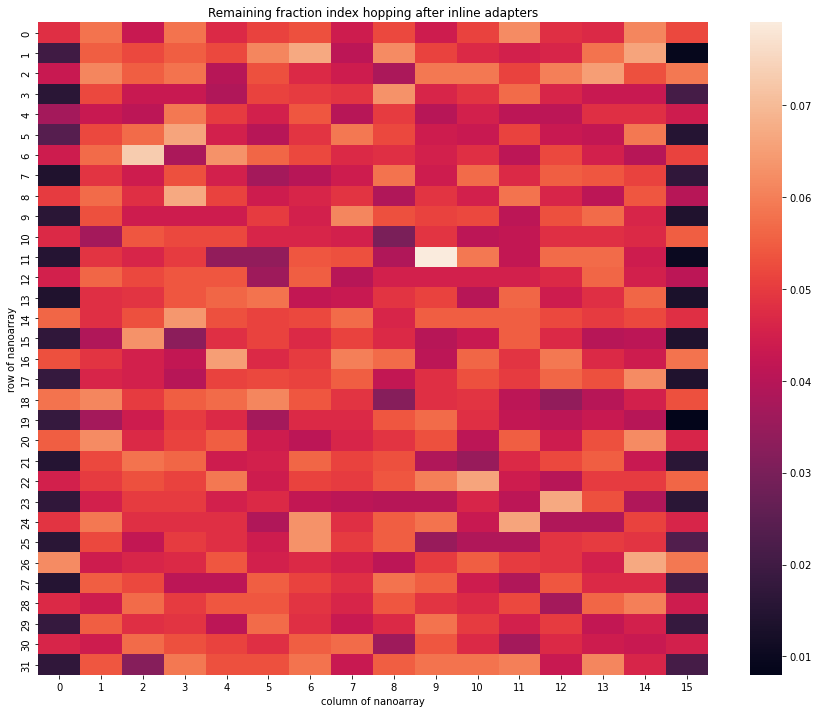

In [64]:
fig, ax = plt.subplots(figsize=[15,12])
sns.heatmap(position_remaining_hops,ax=ax)
ax.set_xlabel("column of nanoarray")
ax.set_ylabel("row of nanoarray")
ax.set_title("Remaining fraction index hopping after inline adapters")

In [65]:
overall_remaining_hops

0.0473046875

In [66]:
# The average over all cell-level reductions should be the same

p=[position_remaining_hops[i5][i7]  for i5 in range(i5s) for i7 in range(i7s)]
sum(p)/len(p)

0.04730468749999999

Again, the rectangle seems ok but not as good as the square. 90% of cells better than 0.058 index hopping remaining is actually quite good, because this means at most ~0.6% increase to background, which is very manageable.

In [67]:
# 90% of wells have less than this amount of index hopping remaining

np.percentile(p, 90)

0.058000000000000045

 ## Well-to-well variability?
It seems possible that our 32x32 predictions might not apply (for the "better diagonal" case) if there are some random wells that don't have (as many) reads. One way to deal with this would be to weight the index hopping function by some kind of probability vector (representing read depth variability and also some "empty" wells).

In [107]:
i5s, i7s, inlines = (32, 32, 3)

num_iterations = 100
icell8 =  [[ ['' for inline in range(inlines)] for i7 in range(i7s)] for i5 in range(i5s)]

for i5 in range(i5s):
    for i7 in range(i7s):
        icell8[i5][i7][0]=i5
        icell8[i5][i7][1]=i7
        if i5 > i7:
            icell8[i5][i7][2]= 15-math.floor(abs(i5-i7-1)/2)
        else:
            icell8[i5][i7][2]= math.floor(abs(i5-i7)/2)
            
icell8_flat=[icell8[i5][i7] for i5 in range(i5s) for i7 in range(i7s)]

<AxesSubplot:>

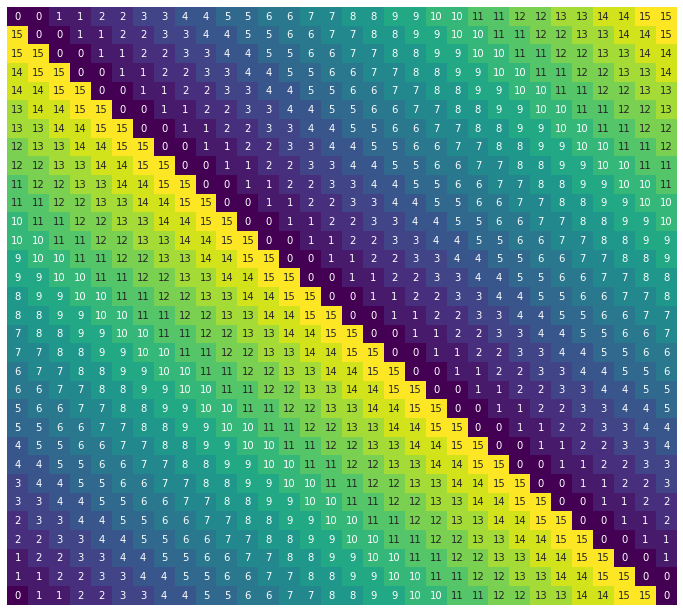

In [108]:
# A picture of the inline indexes in the chip

grid_of_inlines=[[ icell8[i5][i7][2] for i7 in range(i7s)] for i5 in range(i5s)]

fig, ax = plt.subplots(figsize=[12,11])
sns.heatmap(grid_of_inlines, annot=True,cmap=cm.get_cmap('viridis', 16),xticklabels=False,yticklabels=False, cbar=False, ax=ax)

In [133]:
def hop_index_variable(library, i5s, i7s, weights):
    new_library=copy.deepcopy(library)
    i5i7=[i5s,i7s]
    index=math.floor(random.random()*2)
    if index == 0:
        weights = [weights[g][library[abs(index-1)]] for g in range(i5i7[index]) if g!=library[index]]
    else:
        weights = [weights[library[abs(index-1)]][g] for g in range(i5i7[index]) if g!=library[index]]
    hop_options=[i for i in range(i5i7[index]) if i!=library[index]]
    
    new_library[index]=random.choices(hop_options, weights=weights)[0]
    return new_library

In [134]:
# perform index hopping several times on the whole icell8 array
# then check whether we can identify it using the inline indexes

# defining some variability. This is the fraction of reads in each well.

weights=[[1/(1+np.exp(-np.random.normal(0,2))) for j in range(i5s)] for i in range(i7s)]

results= [None] * num_iterations
for j in range(num_iterations):
    icell8_hopped=[[hop_index_variable(icell8[i5][i7], i5s, i7s, weights) for i7 in range(i7s)] for i5 in range(i5s)]
    results[j]=[[icell8_hopped[i5][i7] in icell8_flat for i7 in range(i7s)] for i5 in range(i5s)]

results_flat=[results[j][i5][i7] for j in range(num_iterations) for i5 in range(i5s) for i7 in range(i7s)]

In [135]:
# calculate the fraction remaining of index hopping

overall_remaining_hops=sum(results_flat)/len(results_flat)

# calculate the same, but by position in the icell8 chip

position_remaining_hops=[[sum([results[j][i5][i7]/num_iterations for j in range(num_iterations)]) for i7 in range(i7s)] for i5 in range(i5s)]

Text(0.5, 1.0, 'Remaining fraction index hopping after inline adapters')

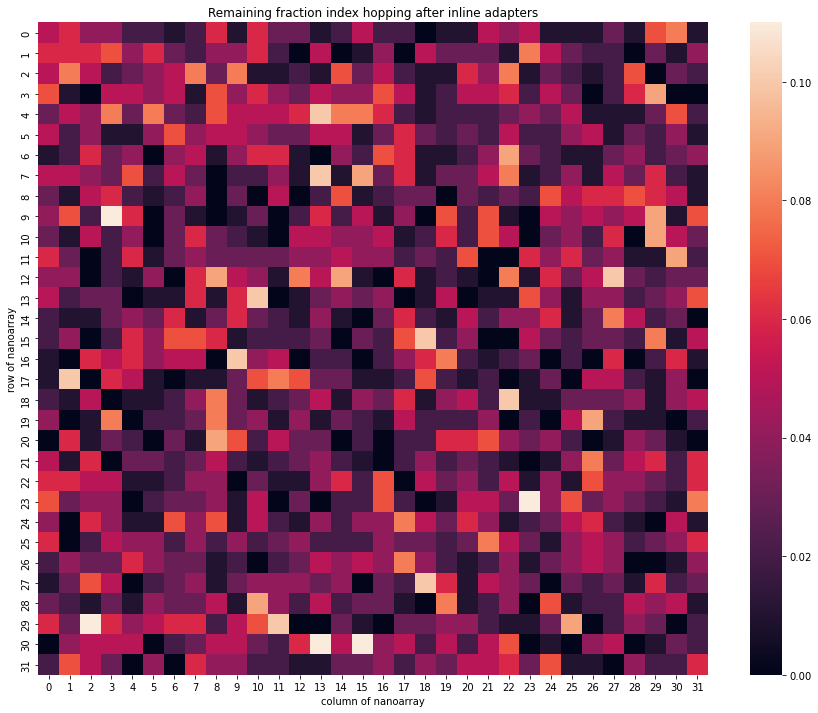

In [136]:
fig, ax = plt.subplots(figsize=[15,12])
sns.heatmap(position_remaining_hops,ax=ax)
ax.set_xlabel("column of nanoarray")
ax.set_ylabel("row of nanoarray")
ax.set_title("Remaining fraction index hopping after inline adapters")

In [137]:
overall_remaining_hops

0.03302734375

In [138]:
# The average over all cell-level reductions should be the same

p=[position_remaining_hops[i5][i7]  for i5 in range(i5s) for i7 in range(i7s)]
sum(p)/len(p)

0.03302734375000003

In [139]:
# 90% of wells have less than this amount of index hopping remaining

np.percentile(p, 90)

0.060000000000000005

OK, this seems to be fine. Even with strong well-to-well variability in read counts, most libraries have less than 6% remaining IH. there is clearly greater variability than we had before, but it hasn't derailed everything. (assuming my read count variability code is working as it seems to be...)